In [1]:
from diffusionGGVAE import *

print("Generating synthetic graph dataset...")
dataset = GraphDataset(num_graphs=500, min_nodes=10, max_nodes=30, p=0.2)
    
# Split into train and test
train_size = int(0.8 * len(dataset))
train_dataset = [dataset[i] for i in range(train_size)]
test_dataset = [dataset[i] for i in range(train_size, len(dataset))]
    
print(f"Dataset created with {len(dataset)} graphs")
print(f"Train set: {len(train_dataset)}, Test set: {len(test_dataset)}")

/Users/aldric-l/Library/Python/3.11/lib/python/site-packages/torch_geometric/typing.py:128: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: dlopen(/Users/aldric-l/Library/Python/3.11/lib/python/site-packages/torch_scatter/_scatter_cpu.so, 0x0006): Symbol not found: __ZN2at4_ops16div__Tensor_mode4callERNS_6TensorERKS2_NSt3__18optionalINS6_17basic_string_viewIcNS6_11char_traitsIcEEEEEE
  Referenced from: <2BF76774-0954-3F15-B7FE-8A5E5111D7DF> /Users/aldric-l/Library/Python/3.11/lib/python/site-packages/torch_scatter/_scatter_cpu.so
  Expected in:     <A51C8C05-245A-3989-8D3C-9A6704422CA5> /Users/aldric-l/Library/Python/3.11/lib/python/site-packages/torch/lib/libtorch_cpu.dylib
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/Users/aldric-l/Library/Python/3.11/lib/python/site-packages/torch_geometric/typing.py:166: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: dlopen(/

Generating synthetic graph dataset...
Dataset created with 500 graphs
Train set: 400, Test set: 100


In [2]:
# Create models
hidden_dim = 64
latent_dim = 32
max_nodes = 30
    
print("Creating models...")
baseline_model = GraphVAE(hidden_dim, latent_dim, max_nodes)
diffusion_model = GraphVAE(hidden_dim, latent_dim, max_nodes)
    
# Setup optimizers
lr = 0.001
baseline_optimizer = optim.Adam(baseline_model.parameters(), lr=lr)
diffusion_optimizer = optim.Adam(diffusion_model.parameters(), lr=lr)
    
# Setup KL annealer
epochs = 100
kl_annealer = KLAnnealer(epochs, start=0.0, end=1.0, strategy='sigmoid')
    
# Train baseline model
print("Training baseline model...")
baseline_losses = train_vae(
    baseline_model, train_dataset, baseline_optimizer, kl_annealer, 
    epochs=epochs, batch_size=16, use_diffusion_loss=False
)
    
# Train diffusion model
print("Training diffusion model...")
diffusion_losses = train_vae(
    diffusion_model, train_dataset, diffusion_optimizer, kl_annealer, 
    epochs=epochs, batch_size=16, use_diffusion_loss=True, diffusion_weight=0.5
)

Creating models...
Training baseline model...
Epoch 0/100, Loss: 0.0779, Recon: 0.0777, KL: 0.1046, Diff: 0.0000, KL Weight: 0.0025
Epoch 10/100, Loss: 0.0669, Recon: 0.0669, KL: 0.0006, Diff: 0.0000, KL Weight: 0.0083
Epoch 20/100, Loss: 0.0664, Recon: 0.0664, KL: 0.0001, Diff: 0.0000, KL Weight: 0.0272
Epoch 30/100, Loss: 0.0662, Recon: 0.0662, KL: 0.0000, Diff: 0.0000, KL Weight: 0.0860
Epoch 40/100, Loss: 0.0662, Recon: 0.0662, KL: 0.0000, Diff: 0.0000, KL Weight: 0.2402
Epoch 50/100, Loss: 0.0661, Recon: 0.0661, KL: 0.0000, Diff: 0.0000, KL Weight: 0.5151
Epoch 60/100, Loss: 0.0661, Recon: 0.0661, KL: 0.0000, Diff: 0.0000, KL Weight: 0.7812
Epoch 70/100, Loss: 0.0661, Recon: 0.0661, KL: 0.0000, Diff: 0.0000, KL Weight: 0.9231
Epoch 80/100, Loss: 0.0660, Recon: 0.0660, KL: 0.0000, Diff: 0.0000, KL Weight: 0.9758
Epoch 90/100, Loss: 0.0661, Recon: 0.0661, KL: 0.0000, Diff: 0.0000, KL Weight: 0.9927
Training diffusion model...
Epoch 0/100, Loss: 0.6675, Recon: 0.0780, KL: 0.0937, Dif

In [3]:
# Evaluate models
print("Evaluating models...")
baseline_metrics = evaluate_model(baseline_model, test_dataset)
diffusion_metrics = evaluate_model(diffusion_model, test_dataset)
    
print("\nBaseline Model Metrics:")
print(f"MSE: {baseline_metrics['mse']:.4f} ± {baseline_metrics['mse_std']:.4f}")
print(f"Diffusion Distance: {baseline_metrics['diffusion']:.4f} ± {baseline_metrics['diffusion_std']:.4f}")
    
print("\nDiffusion Model Metrics:")
print(f"MSE: {diffusion_metrics['mse']:.4f} ± {diffusion_metrics['mse_std']:.4f}")
print(f"Diffusion Distance: {diffusion_metrics['diffusion']:.4f} ± {diffusion_metrics['diffusion_std']:.4f}")
    
# Visualization
print("Generating visualizations...")
visualize_graphs(baseline_model, test_dataset, num_samples=3)
visualize_losses(baseline_losses, diffusion_losses)
    
# Visualize latent space (t-SNE)
visualize_latent_space(baseline_model, diffusion_model, test_dataset)
    

Evaluating models...

Baseline Model Metrics:
MSE: 0.0702 ± 0.0088
Diffusion Distance: 0.4321 ± 0.1980

Diffusion Model Metrics:
MSE: 0.0703 ± 0.0086
Diffusion Distance: 0.4355 ± 0.2039
Generating visualizations...


## Part 2

Generating synthetic dataset...
Dataset generated: 1600 training graphs, 400 test graphs

Training baseline Graph VAE...


/Users/aldric-l/Library/Python/3.11/lib/python/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 0/150, Loss: 213.3112, Recon Loss: 213.3112, KL Loss: 24.5085, Diffusion Loss: 0.0000, KL Weight: 0.0000
Epoch 5/150, Loss: 156.0713, Recon Loss: 153.2707, KL Loss: 105.1615, Diffusion Loss: 0.0000, KL Weight: 0.0266
Epoch 10/150, Loss: 157.9723, Recon Loss: 151.2589, KL Loss: 65.9488, Diffusion Loss: 0.0000, KL Weight: 0.1018
Epoch 15/150, Loss: 162.5682, Recon Loss: 152.4608, KL Loss: 47.6421, Diffusion Loss: 0.0000, KL Weight: 0.2122
Epoch 20/150, Loss: 166.7930, Recon Loss: 154.3709, KL Loss: 36.7404, Diffusion Loss: 0.0000, KL Weight: 0.3381
Epoch 25/150, Loss: 170.3388, Recon Loss: 157.2773, KL Loss: 28.5627, Diffusion Loss: 0.0000, KL Weight: 0.4573
Epoch 30/150, Loss: 172.2949, Recon Loss: 160.1342, KL Loss: 22.1686, Diffusion Loss: 0.0000, KL Weight: 0.5486
Epoch 35/150, Loss: 172.9779, Recon Loss: 162.4749, KL Loss: 17.6318, Diffusion Loss: 0.0000, KL Weight: 0.5957
Epoch 40/150, Loss: 148.0991, Recon Loss: 147.0315, KL Loss: 110.2848, Diffusion Loss: 0.0000, KL Weight:

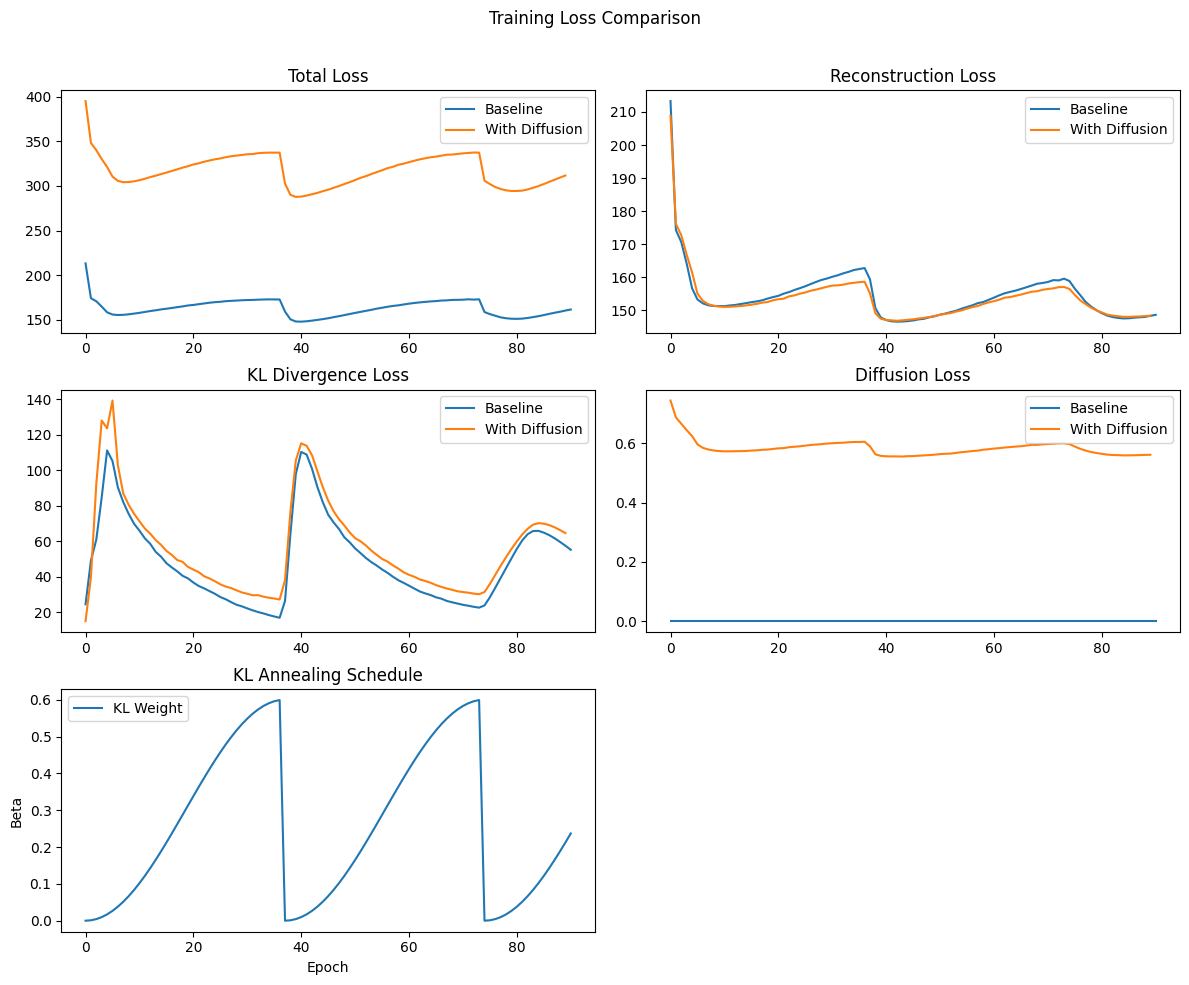

Loss curves saved as 'loss_comparison.png'
Graph reconstructions saved as 'graph_reconstructions.png'
Adjacency matrices saved as 'adjacency_matrices.png'


/var/folders/qc/fbm2wz190nqd87d2mq7l90_80000gn/T/ipykernel_66524/3900093947.py:86: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  recon_plt.show()
/var/folders/qc/fbm2wz190nqd87d2mq7l90_80000gn/T/ipykernel_66524/3900093947.py:87: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  matrix_plt.show()


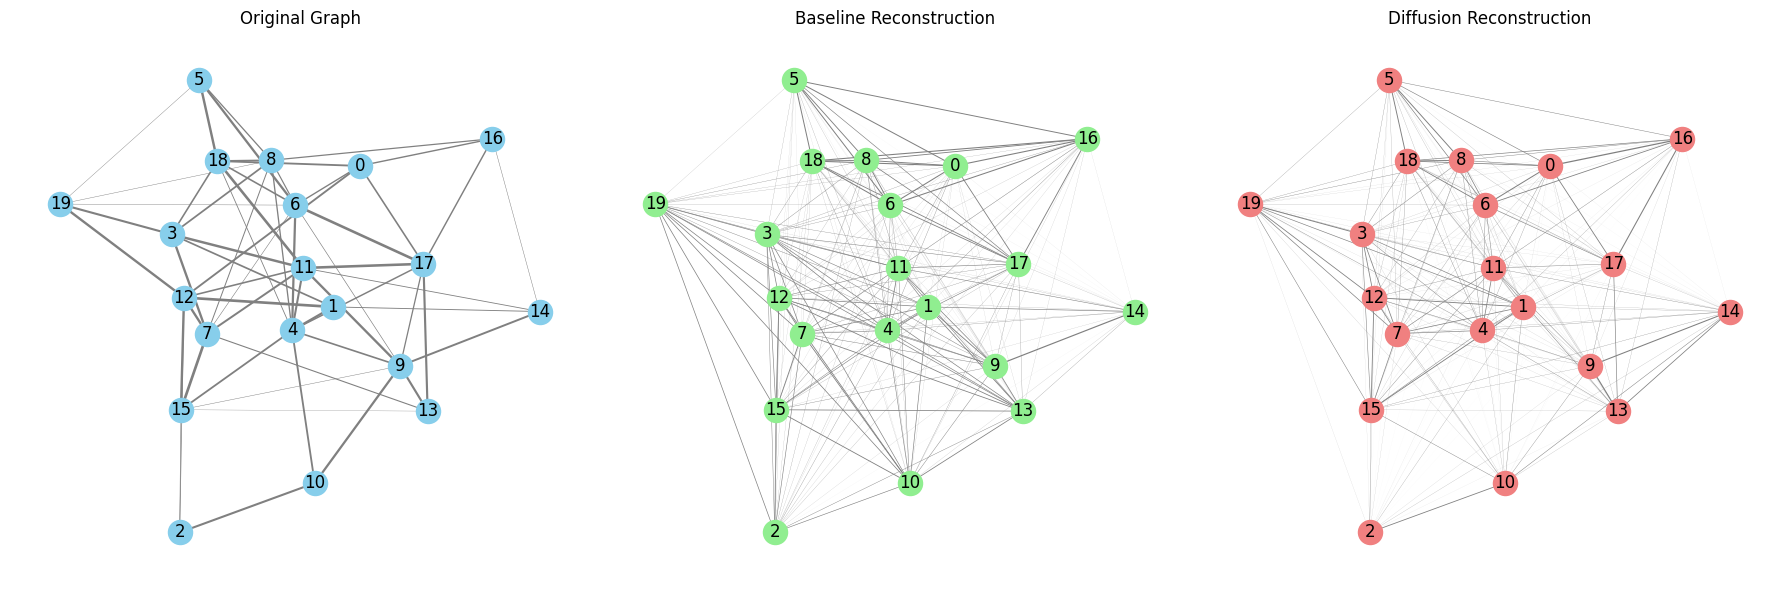

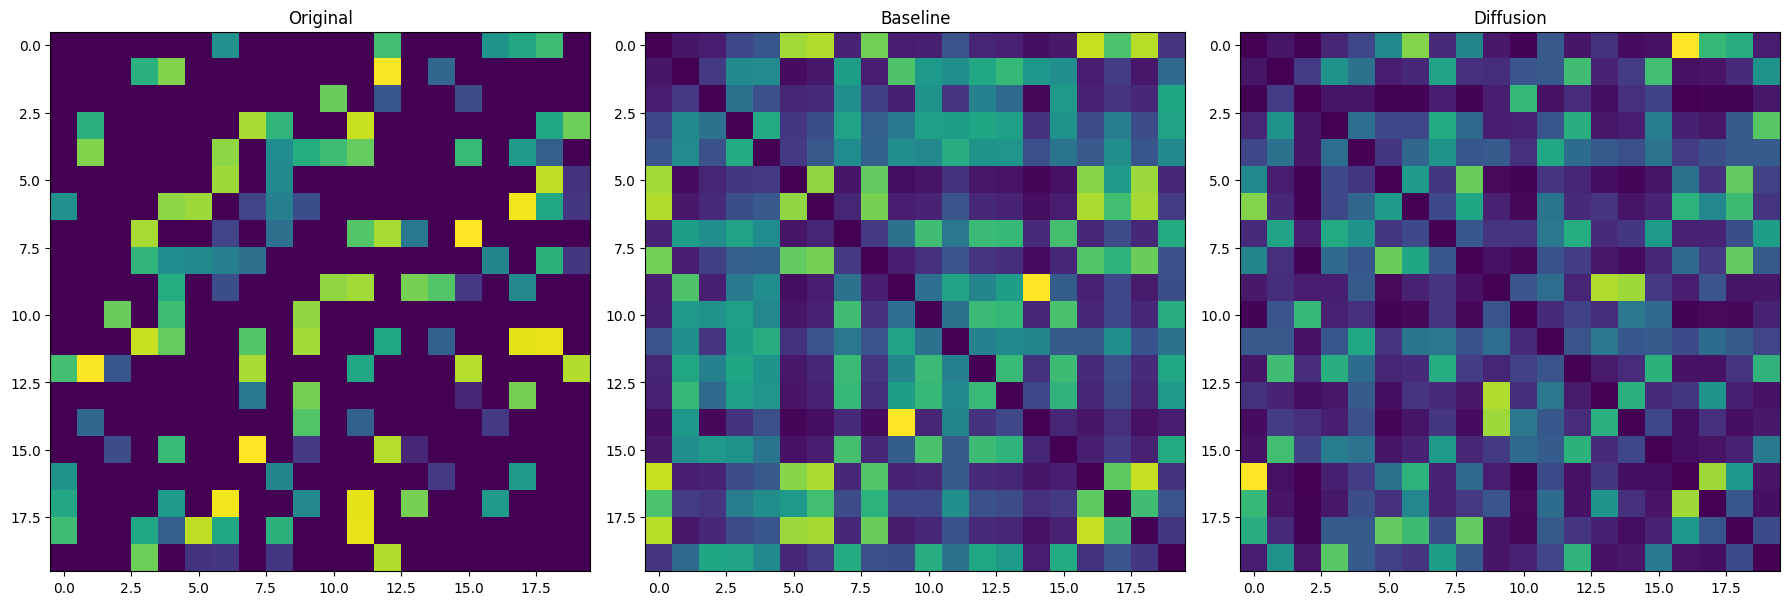

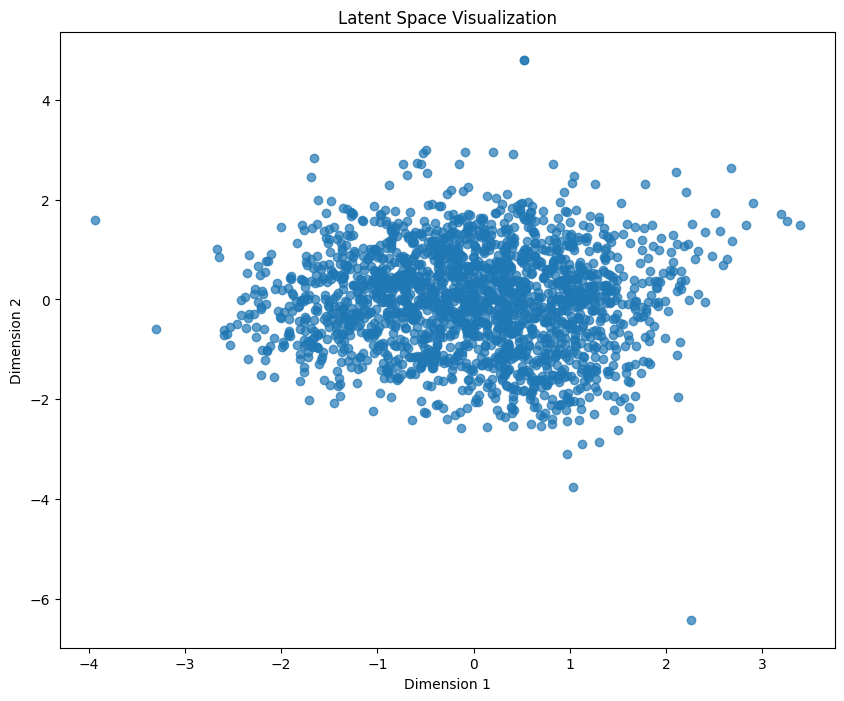

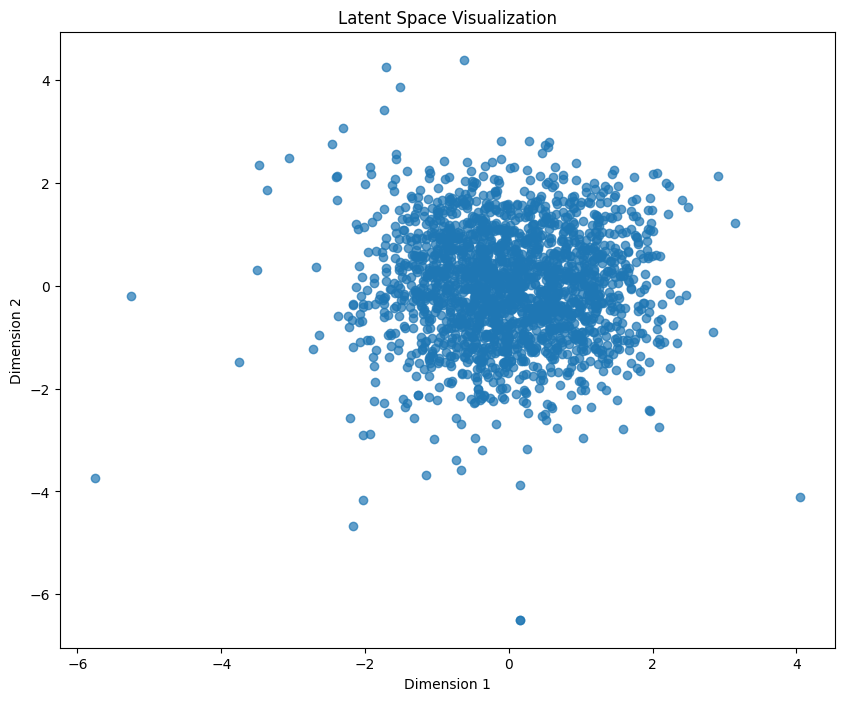

Latent space visualizations saved

Benchmark completed!


In [4]:
from diffusionGVAE2 import *

# Parameters
num_nodes = 20
num_graphs = 2000
hidden_dim = 64
latent_dim = 2
node_feature_size = 8  # Embedding dimension for nodes
epochs = 150
batch_size = 64
learning_rate = 0.001
t_diffusion = 1.0
diffusion_loss_weight = 250
patience = 50  # For early stopping

# Generate dataset
print("Generating synthetic dataset...")
dataset = generate_erdos_renyi_dataset(num_graphs=num_graphs, num_nodes=num_nodes)

# Split dataset into train/test
train_size = int(0.8 * len(dataset))
train_dataset = dataset[:train_size]
test_dataset = dataset[train_size:]

print(f"Dataset generated: {len(train_dataset)} training graphs, {len(test_dataset)} test graphs")

# Initialize models
baseline_model = GraphVAE(num_nodes=num_nodes, hidden_dim=hidden_dim, 
                            latent_dim=latent_dim, node_feature_size=node_feature_size)
diffusion_model = GraphVAE(num_nodes=num_nodes, hidden_dim=hidden_dim, 
                            latent_dim=latent_dim, node_feature_size=node_feature_size)

# Train baseline model with cyclical KL annealing
print("\nTraining baseline Graph VAE...")
start_time = time.time()
baseline_losses = train_model(baseline_model, train_dataset, epochs=epochs, batch_size=batch_size, 
                            learning_rate=learning_rate, diffusion_loss_weight=0.0, kl_annealing=True,
                            beta_min=0.0, beta_max=0.6, patience=patience)
baseline_time = time.time() - start_time
print(f"Baseline training completed in {baseline_time:.2f} seconds")

# Train diffusion distance model with cyclical KL annealing
print("\nTraining Graph VAE with diffusion distance loss...")
start_time = time.time()
diffusion_losses = train_model(diffusion_model, train_dataset, epochs=epochs, batch_size=batch_size,
                                learning_rate=learning_rate, diffusion_loss_weight=diffusion_loss_weight, 
                                t_diffusion=t_diffusion, kl_annealing=True,
                                beta_min=0.0, beta_max=1.0, patience=patience)
diffusion_time = time.time() - start_time
print(f"Diffusion model training completed in {diffusion_time:.2f} seconds")

# Evaluate models
print("\nEvaluating models on test dataset...")
baseline_metrics = evaluate_model(baseline_model, test_dataset, t_diffusion)
diffusion_metrics = evaluate_model(diffusion_model, test_dataset, t_diffusion)

print("\nTest Results:")
print(f"Baseline Model - Recon Loss: {baseline_metrics[0]:.4f}, KL Loss: {baseline_metrics[1]:.4f}, Diffusion Distance: {baseline_metrics[2]:.4f}")
print(f"Diffusion Model - Recon Loss: {diffusion_metrics[0]:.4f}, KL Loss: {diffusion_metrics[1]:.4f}, Diffusion Distance: {diffusion_metrics[2]:.4f}")

# Calculate improvement percentages
recon_improvement = (baseline_metrics[0] - diffusion_metrics[0]) / baseline_metrics[0] * 100
kl_change = (diffusion_metrics[1] - baseline_metrics[1]) / baseline_metrics[1] * 100
diffusion_improvement = (baseline_metrics[2] - diffusion_metrics[2]) / baseline_metrics[2] * 100

print("\nImprovement Analysis:")
print(f"Reconstruction Loss: {recon_improvement:.2f}% {'improvement' if recon_improvement > 0 else 'degradation'}")
print(f"KL Divergence: {abs(kl_change):.2f}% {'increase' if kl_change > 0 else 'decrease'}")
print(f"Diffusion Distance: {diffusion_improvement:.2f}% {'improvement' if diffusion_improvement > 0 else 'degradation'}")

# Visualizations
print("\nGenerating visualizations...")

# Plot loss curves with KL weights
kl_weights = baseline_losses[4]  # KL weights from baseline training
loss_plt = plot_loss_curves(baseline_losses[:4], diffusion_losses[:4], kl_weights)
loss_plt.show()
print("Loss curves saved as 'loss_comparison.png'")

# Sample a test graph for visualization
sample_idx = 0
sample_graph = test_dataset[sample_idx]

# Compare reconstructions
recon_plt, matrix_plt = compare_reconstructions(baseline_model, diffusion_model, sample_graph)
recon_plt.show()
matrix_plt.show()
print("Graph reconstructions saved as 'graph_reconstructions.png'")
print("Adjacency matrices saved as 'adjacency_matrices.png'")

# Visualize latent spaces
baseline_latent_plt = visualize_latent_space(baseline_model, test_dataset)
baseline_latent_plt.show()

diffusion_latent_plt = visualize_latent_space(diffusion_model, test_dataset)
diffusion_latent_plt.show()
print("Latent space visualizations saved")

print("\nBenchmark completed!")